<a href="https://colab.research.google.com/github/VaishnaviMoorthy-SRM/Diabetes_prediction_using_RF/blob/main/DPQA.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, roc_auc_score, f1_score, confusion_matrix
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import StratifiedKFold, GridSearchCV
from imblearn.over_sampling import SMOTE
df = pd.read_csv('DPQA.csv')

# Remove rows with non-numeric values or invalid values like '#VALUE!'
# Replace them with NaN for easy handling
df.replace('#VALUE!', np.nan, inplace=True)

# Convert columns to numeric (excluding 'Insulin' which is the target)
numeric_cols = ['Age', 'ACR', 'BGL_F', 'BGL_R', 'BMI', 'BP_S', 'BP_D', 'HbA1c', 'LDL', 'OS', 'Fam_h', 'Weight']
df[numeric_cols] = df[numeric_cols].apply(pd.to_numeric, errors='coerce')

# Drop rows with missing values (NaN) in any of the numeric columns
df.dropna(subset=numeric_cols, inplace=True)

# Separate features (X) and target variable (y)
X = df.drop('Insulin', axis=1)
y = df['Insulin']

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Standardize the feature data (mean=0, std=1)
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# Handling class imbalance with SMOTE
smote = SMOTE(random_state=42)
X_train_resampled, y_train_resampled = smote.fit_resample(X_train, y_train)

# Initialize and train your machine learning model (Random Forest Classifier)
rf = RandomForestClassifier(random_state=1)

# Fit the model on the resampled training data
rf.fit(X_train_resampled, y_train_resampled)

# Predict on the test data
y_pred = rf.predict(X_test)

# Calculate evaluation metrics (e.g., accuracy, ROC AUC, F1-score)
accuracy = accuracy_score(y_test, y_pred)
roc_auc = roc_auc_score(y_test, y_pred)

print(f'Accuracy: {accuracy:.4f}')
print(f'ROC AUC: {roc_auc:.4f}')

# Hyperparameter tuning using GridSearchCV
param_grid = {
    'n_estimators': [100, 200, 300],
    'max_depth': [5, 10, 15]
}

grid_search = GridSearchCV(estimator=rf, param_grid=param_grid, cv=StratifiedKFold(n_splits=5, shuffle=True))
grid_search.fit(X_train_resampled, y_train_resampled)

best_rf = grid_search.best_estimator_

# Evaluate the best model
y_pred_best = best_rf.predict(X_test)
accuracy_best = accuracy_score(y_test, y_pred_best)
roc_auc_best = roc_auc_score(y_test, y_pred_best)

print('\nBest Model Evaluation:')
print(f'Accuracy: {accuracy_best:.4f}')
print(f'ROC AUC: {roc_auc_best:.4f}')

Accuracy: 0.9666
ROC AUC: 0.7389

Best Model Evaluation:
Accuracy: 0.9650
ROC AUC: 0.7787


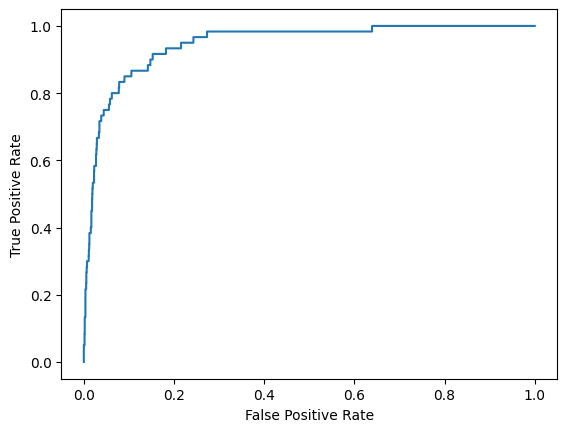

In [ ]:
import matplotlib.pyplot as plt
from sklearn.metrics import roc_curve

def plot_roc_curve(y_test, y_pred_best):
    """
    plots the roc curve based of the probabilities
    """

    fpr, tpr, thresholds = roc_curve(y_test, y_pred_best)
    plt.plot(fpr, tpr)
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.show()
y_pred_prob_best = best_rf.predict_proba(X_test)[:, 1]  # Get predicted probabilities for class 1
plot_roc_curve(y_test, y_pred_prob_best)